# Demo of LDAPathwayPrediction modeling pipeline

## Load all required modules

In [1]:
from Model import Model
from Validation import Validation
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np

## Load data files 

In [2]:
data_df=Model().df_pkl
train,test,train_df,test_df=Model().get_train_and_test(data_df.copy())

## Get dictionary and corpus from train set

In [3]:
dictionary,corpus=Model().get_dict_corpus(train)
model=Model().MyLDA(corpus,dictionary,num_topics=100,random_state=250,passes=100)

## Get similarity between topics

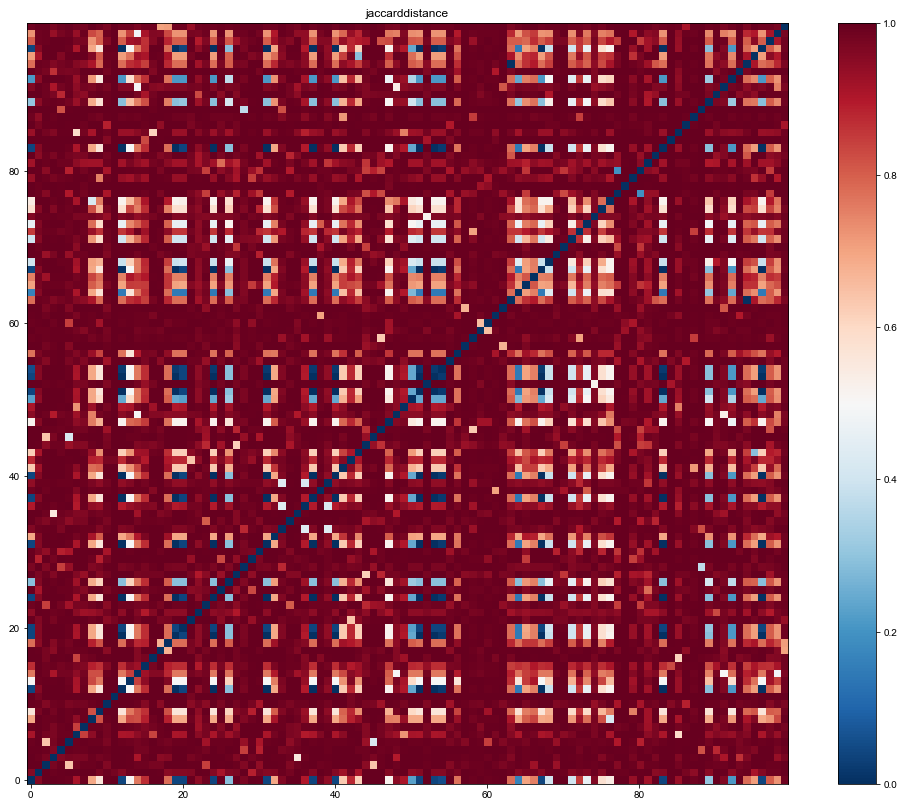

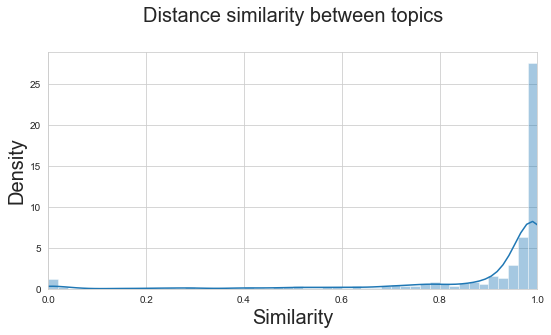

In [4]:
distance_list=Validation().get_topic_similarity(topics=100,model=model,distance='jaccard')

In [5]:
#higher the value, more dissimilar the topics
print ("Mean distance is {} and standard deviation is {}".format(np.mean(distance_list),np.std(distance_list)))

Mean distance is 0.9016048305897131 and standard deviation is 0.20854123488916373


## Test the model with test set
### Test 1: comparing enzymes in predicted topics with enzymes in true pathways

In [6]:
output=Validation().solution_for_one_df(test_df,dictionary,model)

test pathway:C5-Branched dibasic acid metabolism
Tp,Fp,Fn,Tn:(14, 537, 10, 2908); true length:24
test pathway:Lipoic acid metabolism
Tp,Fp,Fn,Tn:(0, 0, 5, 3464); true length:5
test pathway:D-Glutamine and D-glutamate metabolism
Tp,Fp,Fn,Tn:(19, 388, 7, 3055); true length:26
test pathway:Toluene degradation
Tp,Fp,Fn,Tn:(24, 343, 3, 3099); true length:27
test pathway:Biosynthesis of 12-, 14- and 16-membered macrolides
Tp,Fp,Fn,Tn:(17, 145, 0, 3307); true length:17
test pathway:Microbial metabolism in diverse environments
Tp,Fp,Fn,Tn:(693, 1105, 45, 1638); true length:738
test pathway:Glycerolipid metabolism
Tp,Fp,Fn,Tn:(21, 734, 27, 2688); true length:48
test pathway:Pentose phosphate pathway
Tp,Fp,Fn,Tn:(47, 666, 12, 2744); true length:59
test pathway:Fatty acid elongation
Tp,Fp,Fn,Tn:(15, 75, 0, 3379); true length:15
test pathway:Carotenoid biosynthesis
Tp,Fp,Fn,Tn:(3, 133, 40, 3293); true length:43


In [7]:
Validation().print_testing_results(output)

Recall mean: 0.6445893454587346 and median 0.7636897001303781
Precision mean: 0.09103117290372503 and median 0.05603907102544704
Accuracy mean: 0.8768862405998741 and median 0.8931968867108677
F1 mean: 0.1488056338457429 and median 0.10476073663679114
specificity mean: 0.8716592791374917 and median 0.8938281075565662


## Run n-fold validation to check test measures

In [8]:
output=Validation().nfold_cv(n=10)

test pathway:Phenylalanine, tyrosine and tryptophan biosynthesis
Tp,Fp,Fn,Tn:(36, 310, 5, 3106); true length:41
test pathway:Monobactam biosynthesis
Tp,Fp,Fn,Tn:(10, 270, 0, 3177); true length:10
test pathway:Tyrosine metabolism
Tp,Fp,Fn,Tn:(37, 706, 30, 2695); true length:67
test pathway:Tryptophan metabolism
Tp,Fp,Fn,Tn:(28, 582, 36, 2820); true length:64
test pathway:Glycine, serine and threonine metabolism
Tp,Fp,Fn,Tn:(43, 889, 30, 2497); true length:73
test pathway:Chlorocyclohexane and chlorobenzene degradation
Tp,Fp,Fn,Tn:(19, 440, 6, 2997); true length:25
test pathway:Naphthalene degradation
Tp,Fp,Fn,Tn:(9, 249, 0, 3199); true length:9
test pathway:Biosynthesis of vancomycin group antibiotics
Tp,Fp,Fn,Tn:(7, 336, 0, 3114); true length:7
test pathway:Caprolactam degradation
Tp,Fp,Fn,Tn:(14, 506, 9, 2928); true length:23
test pathway:Amino sugar and nucleotide sugar metabolism
Tp,Fp,Fn,Tn:(45, 793, 75, 2546); true length:120
test pathway:Linoleic acid metabolism
Tp,Fp,Fn,Tn:(5, 2

test pathway:Geraniol degradation
Tp,Fp,Fn,Tn:(7, 211, 3, 3248); true length:10
test pathway:Thiamine metabolism
Tp,Fp,Fn,Tn:(5, 285, 25, 3142); true length:30
test pathway:Xylene degradation
Tp,Fp,Fn,Tn:(22, 95, 0, 3340); true length:22
test pathway:Biosynthesis of various secondary metabolites - part 3
Tp,Fp,Fn,Tn:(8, 166, 16, 3270); true length:24
test pathway:Aminoacyl-tRNA biosynthesis
Tp,Fp,Fn,Tn:(7, 292, 24, 3136); true length:31
test pathway:Glycine, serine and threonine metabolism
Tp,Fp,Fn,Tn:(42, 763, 31, 2634); true length:73
test pathway:Vitamin B6 metabolism
Tp,Fp,Fn,Tn:(4, 238, 25, 3190); true length:29
test pathway:Ubiquinone and other terpenoid-quinone biosynthesis
Tp,Fp,Fn,Tn:(10, 322, 39, 3089); true length:49
test pathway:Biosynthesis of various secondary metabolites - part 2
Tp,Fp,Fn,Tn:(13, 314, 15, 3118); true length:28


In [9]:
Validation().print_testing_results(output)

Recall mean: 0.6102211194574514 and median 0.6127062384120905
Precision mean: 0.057658511108295826 and median 0.05780418379592986
Accuracy mean: 0.8744466833162496 and median 0.8769650085162167
F1 mean: 0.10019065743184416 and median 0.10080467777169466
specificity mean: 0.8755434673492184 and median 0.8783965397759368


## Plot all relevant distributions

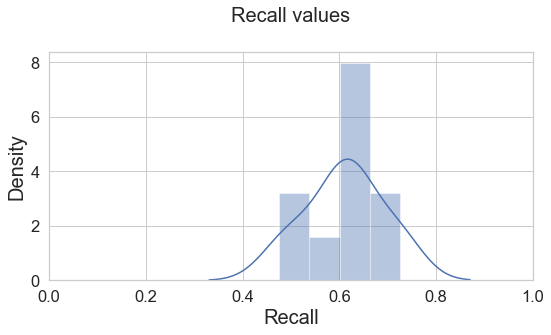

In [10]:
Validation().plot_a_distribution(output[0],xlabel='Recall',
                                xlim_tuple=(0,1),
                                ylabel='Density',title='Recall values')


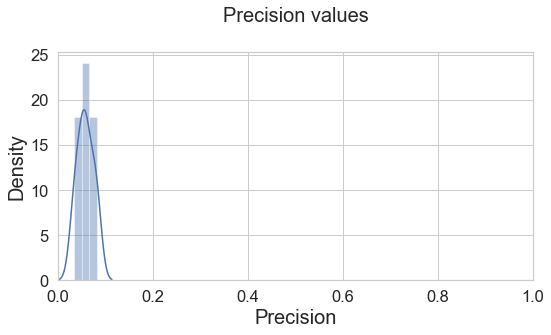

In [11]:
Validation().plot_a_distribution(output[1],xlabel='Precision',
                                xlim_tuple=(0,1),
                                ylabel='Density',title='Precision values')


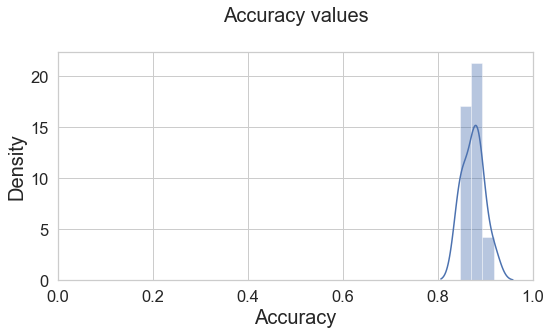

In [12]:
Validation().plot_a_distribution(output[2],xlabel='Accuracy',
                                xlim_tuple=(0,1),
                                ylabel='Density',title='Accuracy values')


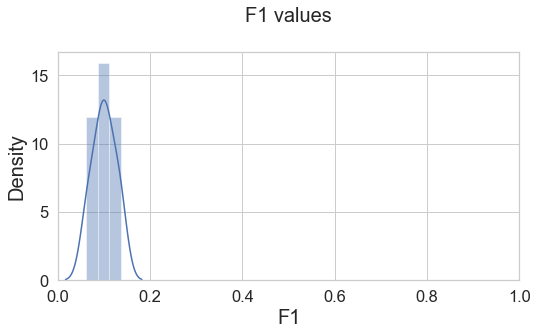

In [13]:
Validation().plot_a_distribution(output[3],xlabel='F1',
                                xlim_tuple=(0,1),
                                ylabel='Density',title='F1 values')


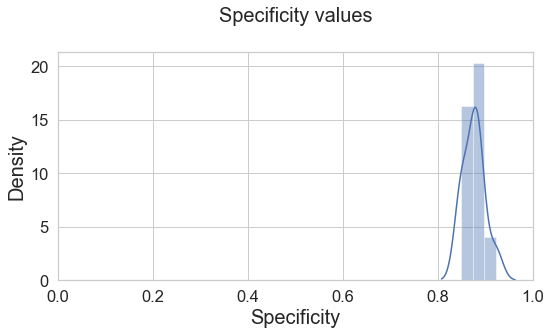

In [14]:
Validation().plot_a_distribution(output[4],xlabel='Specificity',
                                xlim_tuple=(0,1),
                                ylabel='Density',title='Specificity values')


###  Test 2: similarity of test document with documents in the training set

In [4]:
df_result=Validation().compare_test_train_docs(test_df,train_df,model,dictionary)

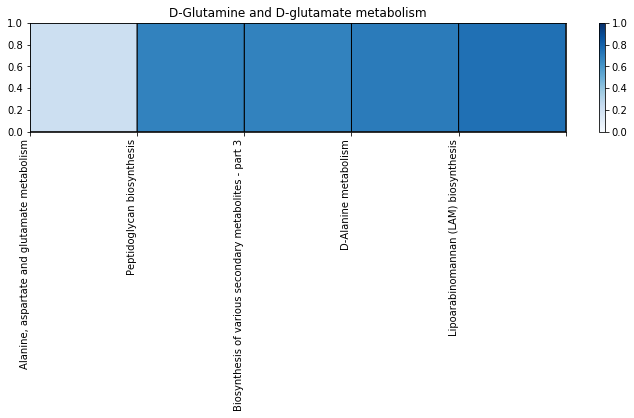

<Figure size 432x288 with 0 Axes>

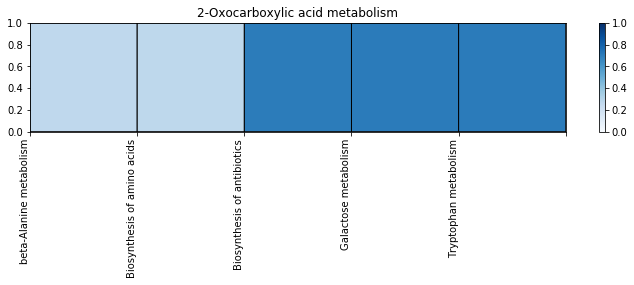

<Figure size 432x288 with 0 Axes>

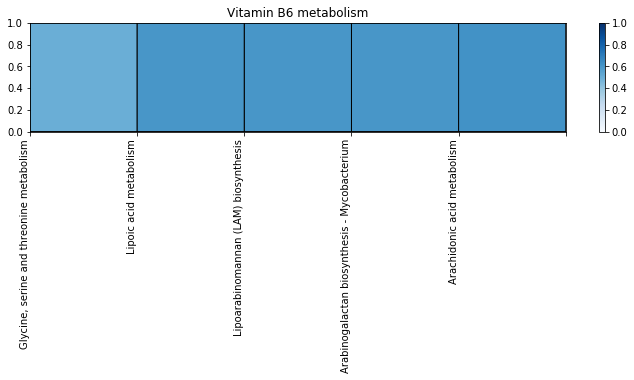

<Figure size 432x288 with 0 Axes>

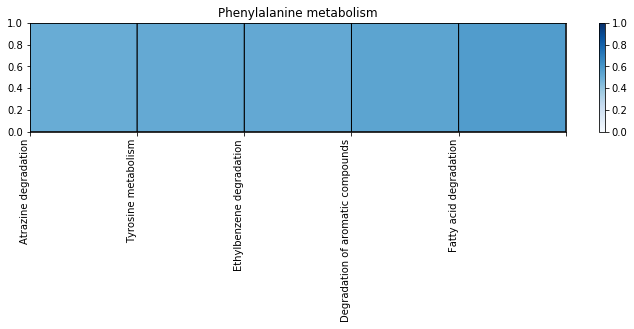

<Figure size 432x288 with 0 Axes>

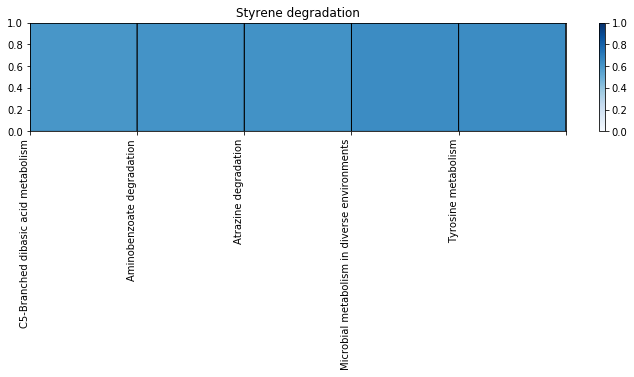

<Figure size 432x288 with 0 Axes>

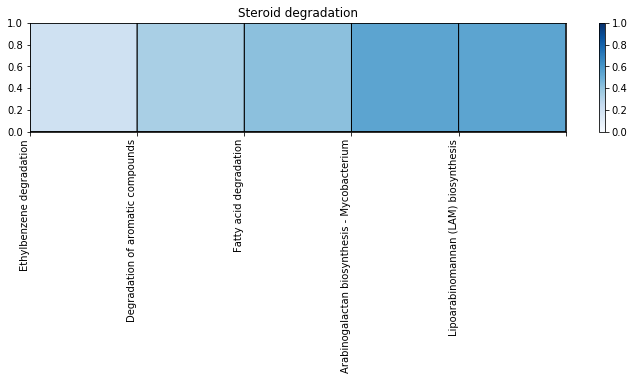

<Figure size 432x288 with 0 Axes>

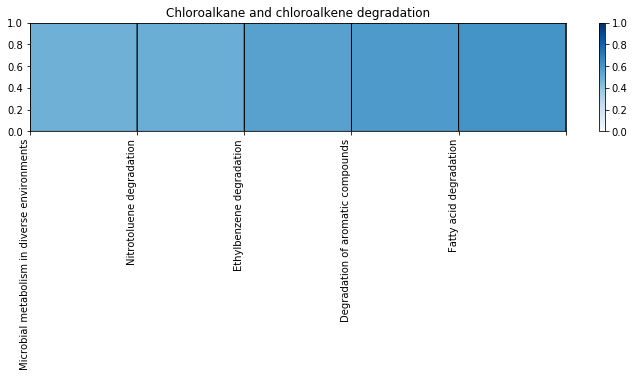

<Figure size 432x288 with 0 Axes>

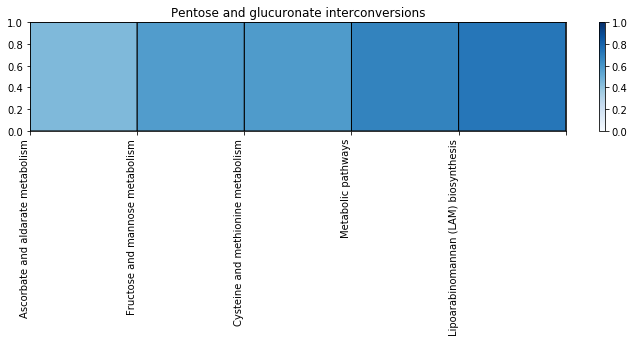

<Figure size 432x288 with 0 Axes>

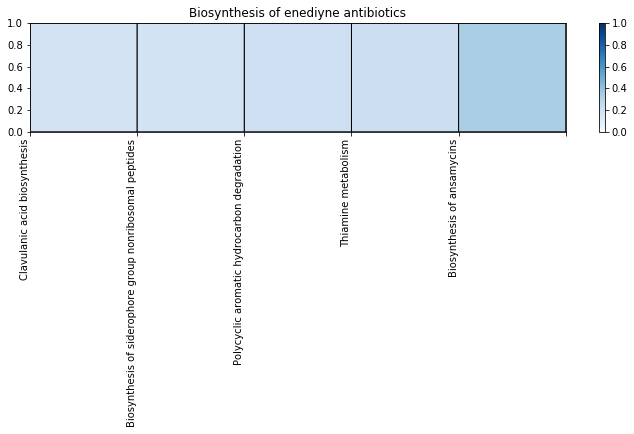

<Figure size 432x288 with 0 Axes>

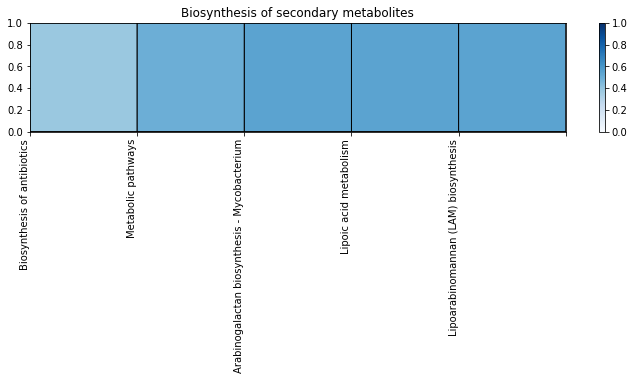

<Figure size 432x288 with 0 Axes>

In [7]:
df_result.head()
Validation().print_heat_map_for_one(df_result,test_df)

## Validate the model with new dataset from a gut microbial strain

In [12]:
test_df

,Map,Name,EC
51,map00471,D-Glutamine and D-glutamate metabolism,"[ec:1.4.1.14, ec:1.4.1.2, ec:1.4.1.3, ec:1.4.1..."
131,map01210,2-Oxocarboxylic acid metabolism,"[ec:2.2.1.6, ec:2.6.1.2, ec:2.3.1.1, ec:1.1.1...."
98,map00750,Vitamin B6 metabolism,"[ec:3.1.3.74, ec:2.7.1.35, ec:1.4.3.5, ec:1.4...."
35,map00360,Phenylalanine metabolism,"[ec:1.2.1.10, ec:5.1.1.11, ec:1.4.1.20, ec:1.4..."
89,map00643,Styrene degradation,"[ec:3.7.1.2, ec:1.14.13.63, ec:1.13.11.5, ec:1..."
115,map00984,Steroid degradation,"[ec:1.1.3.6, ec:1.3.99.5, ec:1.1.1.239, ec:1.1..."
82,map00625,Chloroalkane and chloroalkene degradation,"[ec:4.5.1.3, ec:1.2.1.46, ec:1.2.98.1, ec:1.1...."
3,map00040,Pentose and glucuronate interconversions,"[ec:1.2.1.26, ec:1.2.1.3, ec:1.1.1.22, ec:2.7...."
125,map01059,Biosynthesis of enediyne antibiotics,"[ec:2.3.1.165, ec:2.6.1.86, ec:1.3.99.24, ec:1..."
127,map01110,Biosynthesis of secondary metabolites,"[ec:1.11.1.21, ec:1.11.1.6, ec:3.2.1.28, ec:2...."


In [20]:
valid=['ec:4.2.1.166','ec:2.8.3.8','ec:3.1.2.1','ec:4.2.1.55','ec:1.1.1.157','ec:2.3.1.9'];valid_dist={}
valid_dist['Map']='PF06050'
valid_dist['Name']='UNK pathway'
valid_dist['EC']=[valid]
df_validate=pd.DataFrame(valid_dist)
df_validate

,Map,Name,EC
0,PF06050,UNK pathway,"[ec:4.2.1.166, ec:2.8.3.8, ec:3.1.2.1, ec:4.2...."


In [21]:
df_result=Validation().compare_test_train_docs(df_validate,train_df,model,dictionary)

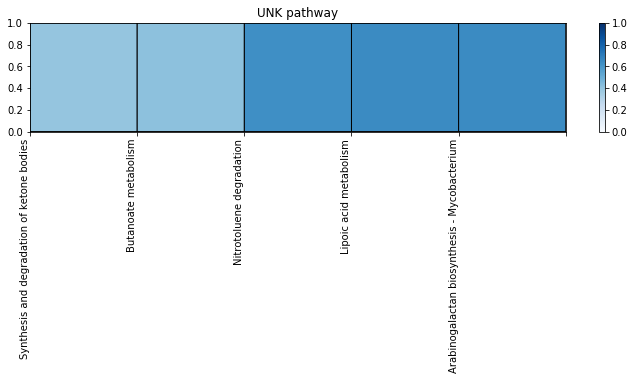

<Figure size 432x288 with 0 Axes>

In [22]:
Validation().print_heat_map_for_one(df_result,df_validate)